# Modeling the Refined Data
Using Clustering then Classification Model

### Importing Libraries and Data

In [57]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm_notebook as tqdm

#### Loading the Profiles

In [58]:
# Loading in the cleaned DF
with open("refined_profiles_1.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df.head()

,Bios,location,Qualification,Specialisation,Age,year of experience
0,Passionate analyst. Explorer. Hipster-friendly problem solver. Freelance music geek. Social media advocate. Reader.,Kalimantan,High School,"[Advanced Auto Diagnostic Techniques, Automotive Apprenticeships]",21,8
1,Twitter fanatic. Devoted web fanatic. Zombie evangelist. Travel aficionado. Bacon lover.,Bali,High School,"[Advanced Vehicle Diagnostics and Management, Maintenance Technian, Motor Vehicle Engineering]",29,5
2,Total alcohol practitioner. Social media buff. Evil beer expert. Devoted analyst. Problem solver. Student.,Java,Bachelors Degree,"[Rail Apprenticeships, Motor Vehicle Engineering]",23,13
3,Extreme twitter advocate. Hardcore internet junkie. Entrepreneur. Friend of animals everywhere.,Jakata,Bachelors Degree,"[Automotive Apprenticeships, Motor Vehicle Engineering]",20,7
4,Problem solver. Devoted introvert. Food geek. Avid writer. Thinker. Troublemaker. Friend of animals everywhere.,Palangkaraya,High School,"[Advanced Vehicle Diagnostics and Management, Rail Engineering Operative, Advanced Auto Diagnostic Techniques]",24,8


## Clustering the Refined Data

### Vectorizing

In [59]:
def string_convert(x):
    """
    First converts the lists in the DF into strings
    """
    if isinstance(x, list):
        return ' '.join(x)
    else:
        return x
    
# Looping through the columns and applying the function
for col in df.columns:
    df[col] = df[col].apply(string_convert)

In [60]:
df

,Bios,location,Qualification,Specialisation,Age,year of experience
0,Passionate analyst. Explorer. Hipster-friendly problem solver. Freelance music geek. Social media advocate. Reader.,Kalimantan,High School,Advanced Auto Diagnostic Techniques Automotive Apprenticeships,21,8
1,Twitter fanatic. Devoted web fanatic. Zombie evangelist. Travel aficionado. Bacon lover.,Bali,High School,Advanced Vehicle Diagnostics and Management Maintenance Technian Motor Vehicle Engineering,29,5
2,Total alcohol practitioner. Social media buff. Evil beer expert. Devoted analyst. Problem solver. Student.,Java,Bachelors Degree,Rail Apprenticeships Motor Vehicle Engineering,23,13
3,Extreme twitter advocate. Hardcore internet junkie. Entrepreneur. Friend of animals everywhere.,Jakata,Bachelors Degree,Automotive Apprenticeships Motor Vehicle Engineering,20,7
4,Problem solver. Devoted introvert. Food geek. Avid writer. Thinker. Troublemaker. Friend of animals everywhere.,Palangkaraya,High School,Advanced Vehicle Diagnostics and Management Rail Engineering Operative Advanced Auto Diagnostic Techniques,24,8
...,...,...,...,...,...,...
6160,Lifelong zombie junkie. Friendly travel buff. Coffeeaholic. Internet enthusiast.,Bandung,Bachelors Degree,Heavy Vehicle Service Advanced Vehicle Diagnostics and Management,19,12
6161,Total introvert. Tv specialist. Pop culture ninja. Web lover. Subtly charming twitter advocate. Explorer.,Bandung,High School,Advanced Vehicle Diagnostics and Management Automotive Apprenticeships,31,6
6162,Friendly zombie specialist. Avid bacon expert. Tv junkie. Alcohol guru. Food aficionado.,Kalimantan,Diploma,Advanced Auto Diagnostic Techniques Advanced Vehicle Diagnostics and Management Rail Engineering Operative,22,7
6163,Wannabe coffee practitioner. Troublemaker. Communicator. Friendly travel advocate. Reader. Thinker.,Java,High School,Heavy Vehicle Service Advanced Vehicle Diagnostics and Management Automotive Apprenticeships,21,5


In [63]:
def vectorization(df, columns):
    """
    Using recursion, iterate through the df until all the categories have been vectorized
    """
    column_name = columns[0]
    
    # Checking if the column name has been removed already
    if column_name not in ['Bios',"Specialisation",'location','Qualification']:
        return df
    
    if column_name in ['location','Qualification']:
        df[column_name.lower()] = df[column_name].cat.codes
        
        df = df.drop(column_name, 1)
        
        return vectorization(df, df.columns)
    
    else:
        # Instantiating the Vectorizer
        vectorizer = CountVectorizer()
        
        # Fitting the vectorizer to the Bios
        x = vectorizer.fit_transform(df[column_name])

        # Creating a new DF that contains the vectorized words
        df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())

        # Concating the words DF with the original DF
        new_df = pd.concat([df, df_wrds], axis=1)

        # Dropping the column because it is no longer needed in place of vectorization
        new_df = new_df.drop(column_name, axis=1)
        
        return vectorization(new_df, new_df.columns) 

In [64]:
# Creating the vectorized DF
vect_df = vectorization(df, df.columns)
vect_df

,Age,year of experience,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,apathy,...,maintenance,management,motor,operative,rail,repair,service,technian,techniques,vehicle
0,21,8,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,29,5,0,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,0,2
2,23,13,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
3,20,7,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,24,8,0,0,0,0,0,0,1,0,...,0,1,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,19,12,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2
6161,31,6,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6162,22,7,0,1,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,1
6163,21,5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2


In [65]:
# Scaling
scaler = MinMaxScaler()

vect_df = pd.DataFrame(scaler.fit_transform(vect_df), index=vect_df.index, columns=vect_df.columns)

In [66]:
vect_df

,Age,year of experience,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,apathy,...,maintenance,management,motor,operative,rail,repair,service,technian,techniques,vehicle
0,0.103448,0.238095,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
1,0.379310,0.095238,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.666667
2,0.172414,0.476190,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.333333
3,0.068966,0.190476,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
4,0.206897,0.238095,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.5,0.0,0.0,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,0.034483,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.666667
6161,0.448276,0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
6162,0.137931,0.190476,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.5,0.0,0.0,0.0,1.0,0.333333
6163,0.103448,0.095238,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.666667


### PCA

In [67]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(vect_df)

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_9 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_9 = vect_df.shape[1] - n_over_9

print("PCA reduces the # of features from", vect_df.shape[1], 'to', n_to_reach_9)

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_9)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(vect_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

PCA reduces the # of features from 133 to 86


0.9893074799534884

### Performing Hierarchical Agglomerative Clustering
- First finding the optimum number of clusters

In [68]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 11, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# The DF for evaluation
eval_df = df_pca

# Looping through different iterations for the number of clusters
for i in tqdm(cluster_cnt):
    
    # Clustering with different number of clusters
    clust = AgglomerativeClustering(n_clusters=i, linkage='complete')
    
    clust.fit(eval_df)
    
    cluster_assignments = clust.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(eval_df, cluster_assignments))
    
    s_scores.append(silhouette_score(eval_df, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(eval_df, cluster_assignments))

<ipython-input-68-2a21996e09df>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(cluster_cnt):


### Helper Function to Evaluate the Clusters

In [69]:
def cluster_eval(y, x):
    """
    Prints the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('bmh')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

### Evaluation of Clusters

The Calinski-Harabasz Score (find max score):
Max Value:
Cluster #    Cluster Score
3       97.17794

Min Value:
Cluster #     Cluster Score
10      67.505031


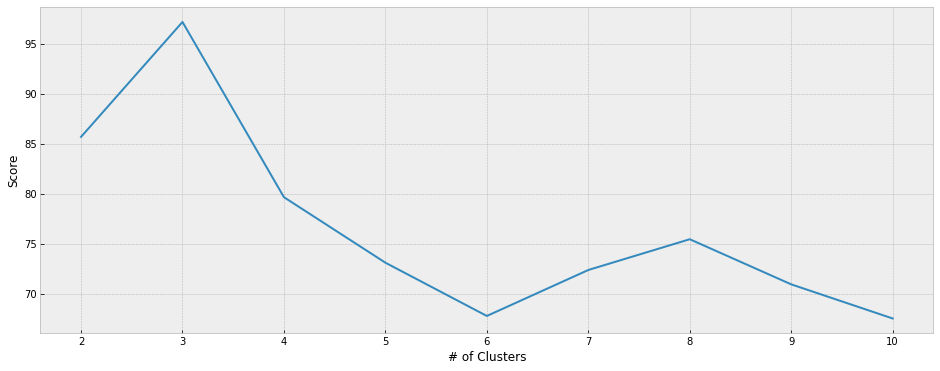


The Silhouette Coefficient Score (find max score):
Max Value:
Cluster #    Cluster Score
3       0.043337

Min Value:
Cluster #    Cluster Score
6       0.014124


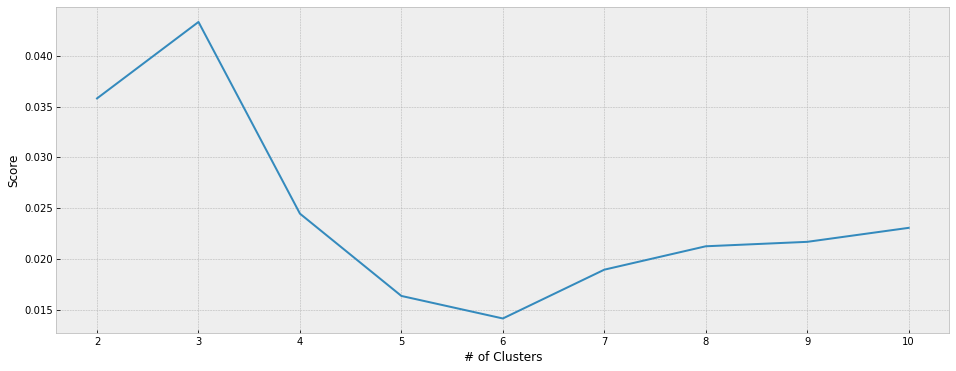


The Davies-Bouldin Score (find minimum score):
Max Value:
Cluster #    Cluster Score
5       6.619191

Min Value:
Cluster #    Cluster Score
3       4.558582


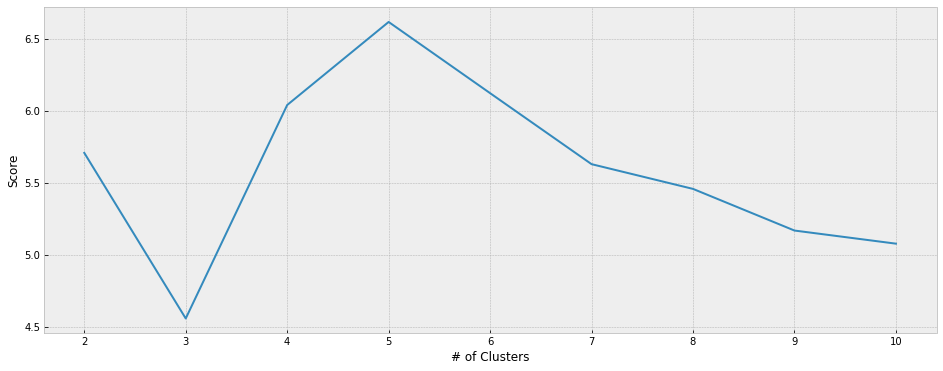

In [70]:
print("The Calinski-Harabasz Score (find max score):")
cluster_eval(ch_scores, cluster_cnt)

print("\nThe Silhouette Coefficient Score (find max score):")
cluster_eval(s_scores, cluster_cnt)

print("\nThe Davies-Bouldin Score (find minimum score):")
cluster_eval(db_scores, cluster_cnt)

### Running HAC
Again but with the optimum cluster count

In [71]:
# Instantiating HAC based on the optimum number of clusters found
hac = AgglomerativeClustering(n_clusters=3, linkage='complete')

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

vect_df['Cluster #'] = cluster_assignments

#### Exporting the Clustered DF and Vectorized DF

In [83]:
with open("refined_cluster_1.pkl",'wb') as fp:
    pickle.dump(df, fp)
    
with open("vectorized_refined_1.pkl", 'wb') as fp:
    pickle.dump(vect_df, fp)

## Classification of the New Profile

### Importing the Different Classification Models

In [73]:
# Importing 3 models
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

### Train, test, splitting

In [74]:
# Assigning the split variables
X = vect_df.drop(["Cluster #"], 1)
y = vect_df['Cluster #']

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Finding the Best Model
- Dummy (Baseline Model)
- KNN
- SVM
- NaiveBayes
- Logistic Regression
- Adaboost

In [75]:
# Dummy
dummy = DummyClassifier(strategy='stratified')

# KNN
knn = KNeighborsClassifier()

# SVM
svm = SVC(gamma='scale')

# NaiveBayes
nb = ComplementNB()

# Logistic Regression
lr = LogisticRegression()

# Adaboost
adab = AdaBoostClassifier()

# List of models
models = [dummy, knn, svm, nb, lr, adab]

# List of model names
names = ['Dummy', 'KNN', 'SVM', 'NaiveBayes', 'Logistic Regression', 'Adaboost']

# Zipping the lists
classifiers = dict(zip(names, models))

In [79]:
# Visualization of the different cluster counts
vect_df['Cluster #'].value_counts().plot('pie', title='Count of Class Distribution')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.

Since we are dealing with an imbalanced dataset _(because each cluster is not guaranteed to have the same amount of profiles)_, we will resort to using the __Macro Avg__ and __F1 Score__ for evaluating the performances of each model.

In [78]:
# Dictionary containing the model names and their scores
models_f1 = {}

# Looping through each model's predictions and getting their classification reports
for name, model in tqdm(classifiers.items()):
    # Fitting the model
    model.fit(X_train, y_train)
    
    print('\n'+ name + ' (Macro Avg - F1 Score):')
    
    # Classification Report
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    f1 = report['macro avg']['f1-score']
    
    # Assigning to the Dictionary
    models_f1[name] = f1
    
    print(f1)

<ipython-input-78-292f2539376c>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name, model in tqdm(classifiers.items()):



Dummy (Macro Avg - F1 Score):
0.3335355284730796

KNN (Macro Avg - F1 Score):
1.0

SVM (Macro Avg - F1 Score):
1.0

NaiveBayes (Macro Avg - F1 Score):
0.9622447741490854

Logistic Regression (Macro Avg - F1 Score):
0.9990520501158798

Adaboost (Macro Avg - F1 Score):
0.8762135762786509



#### Model with the Best Performance

In [80]:
print(max(models_f1, key=models_f1.get), 'Score:', max(models_f1.values()))

KNN Score: 1.0


### Fitting the Best Model to our Dataset
_(Optional: Tune the model with GridSearch)_

In [81]:
# Fitting the model
nb.fit(X, y)

ComplementNB()

### Saving the Classification Model
For future use

In [84]:
from joblib import dump

dump(nb, "refined_model_1.joblib")

['refined_model_1.joblib']